# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>

In [1]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.6, palette='summer')

## Закон больших чисел

#### Формулировка

Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из некоторого распределения, причем $\mathsf{E}\xi_i = a$. Тогда выполнена сходимость $$\frac{\xi_1 + ... + \xi_n}{n} \stackrel{п.н.}{\longrightarrow} a.$$ 

*Замечание 1.* Закон больших чисел имеет несколько формулировок. Данная формулировка часто называется *усиленным законом больших чисел*. В частности, усиленной она является, поскольку в отличии от "простой" версии она не требует условия на дисперсии и утверждает о более сильной сходимости "почти наверное".

*Замечание 2.* Последовательность случайных величин $\xi_1, \xi_2, ...$ сходится почти наверное к случайной величине $\xi$, если $\mathsf{P}\big(\big\{ \omega \in \Omega\:\big|\: \xi_n(\omega) \to \xi(\omega)\big\}\big) = 1$

---

####  Визуализация

Убедимся в справедливости ЗБЧ, сгенерировав набор из случайных величин  $\xi_1, ..., \xi_{1000}$ и посчитав по нему среднее в зависимости от размера набора, то есть величины $S_{n} = \frac{1}{n}\sum\limits_{i=1}^n \xi_i$ для $1 \leqslant n \leqslant 1000$.

Для примера рассмотрим бернуллиевское распределение.

In [2]:
size = 1000  # количество случайных величин
samples = sps.bernoulli(p=0.5).rvs(size=size)
cum_means = samples.cumsum() / (np.arange(size) + 1)

Построим график

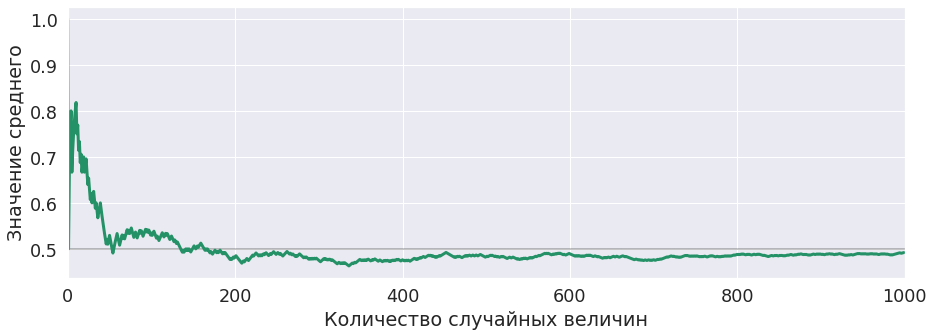

In [3]:
plt.figure(figsize=(15, 5))
plt.plot(cum_means, lw=3)
plt.hlines(0.5, 0, size, alpha=0.3)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Но одного эксперимента мало, чтобы понять свойства вероятностных объектов. **Запомните это!**

Повторим эксперимент 10 раз **независимо**.

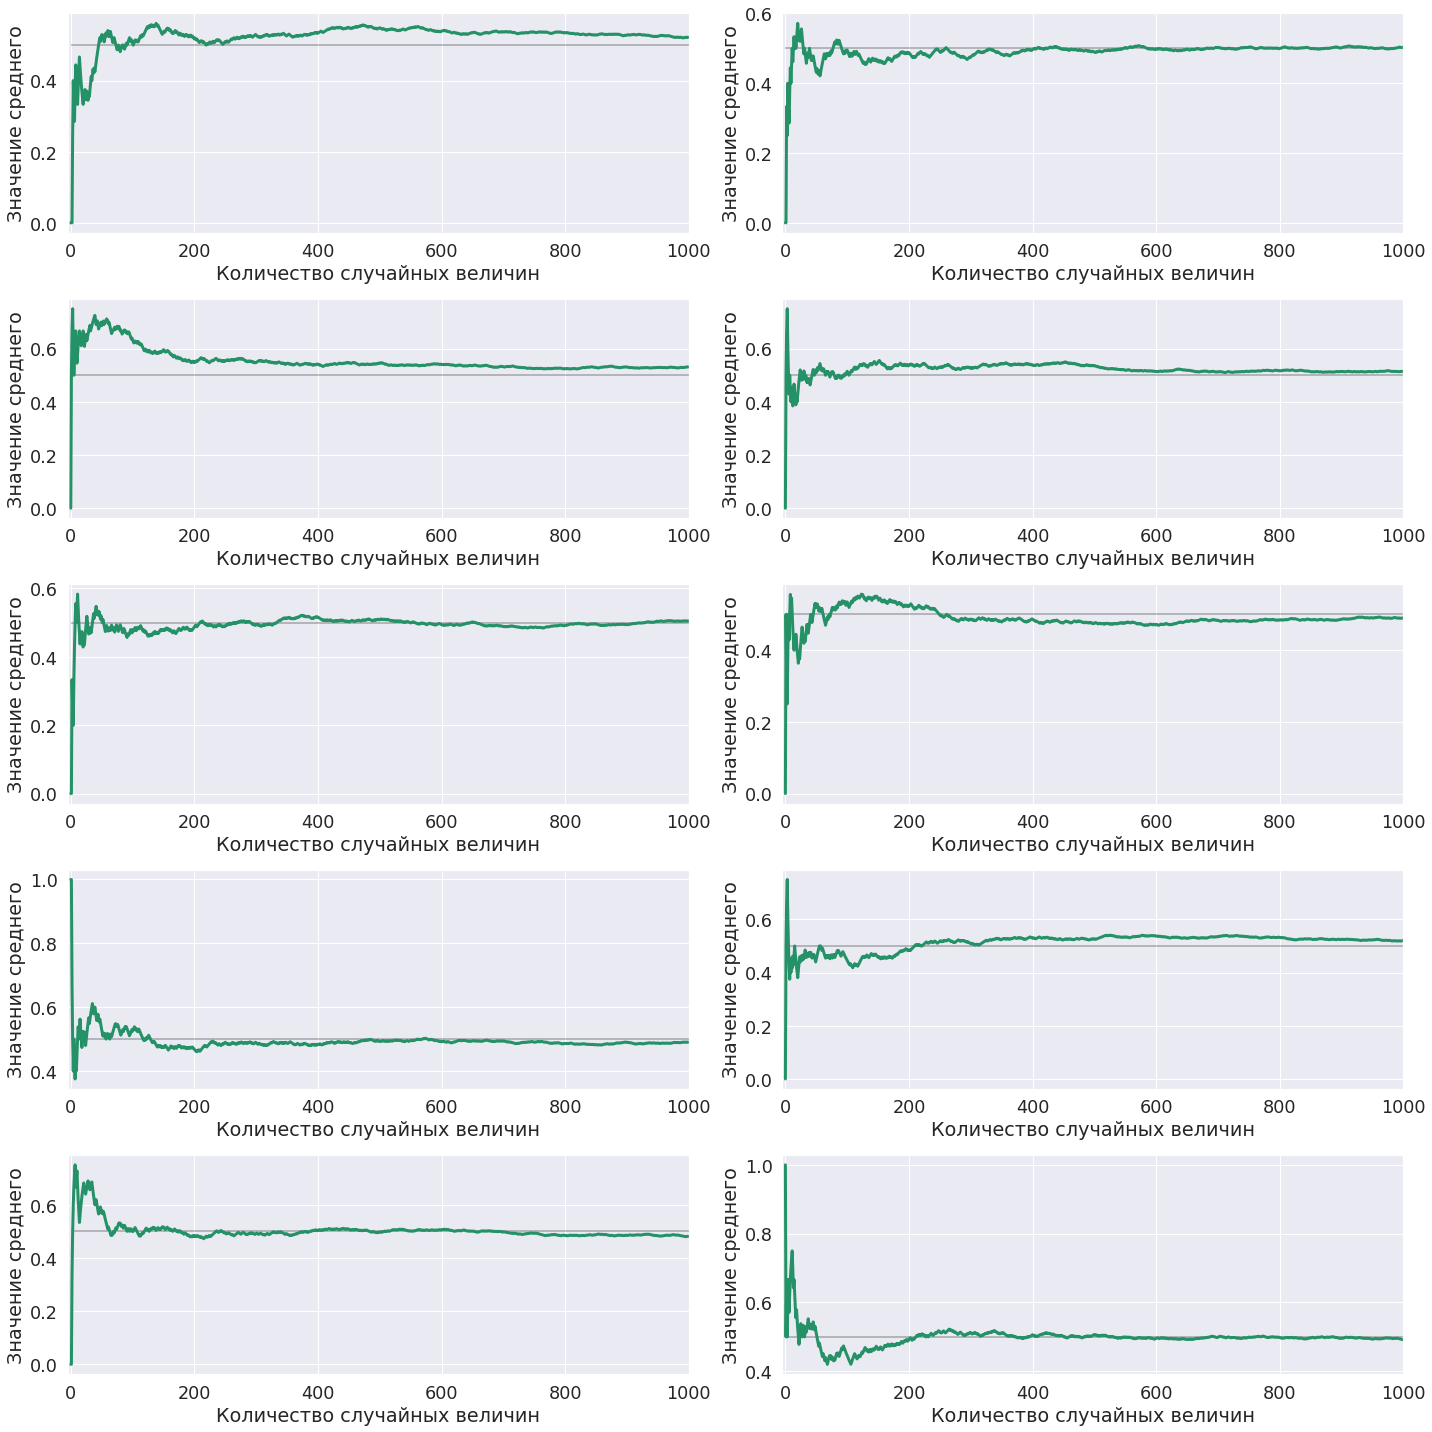

In [4]:
plt.figure(figsize=(20, 20))

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.bernoulli(p=0.5).rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
    
plt.tight_layout()

Сгенерируем большое количество независимых наборов случайных величин

In [5]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.bernoulli(p=0.5).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

И нарисуем их всех одним цветом

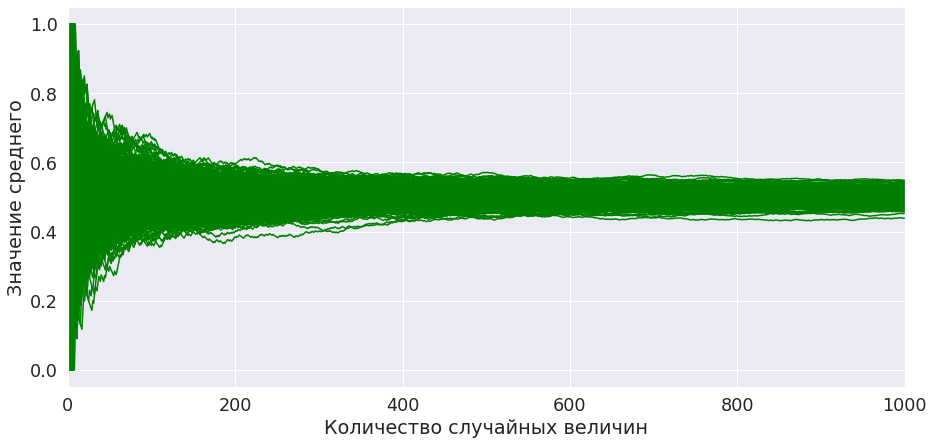

In [6]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green')

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

В подобных "тяжелых" графиках нужно выставлять прозрачность объектов

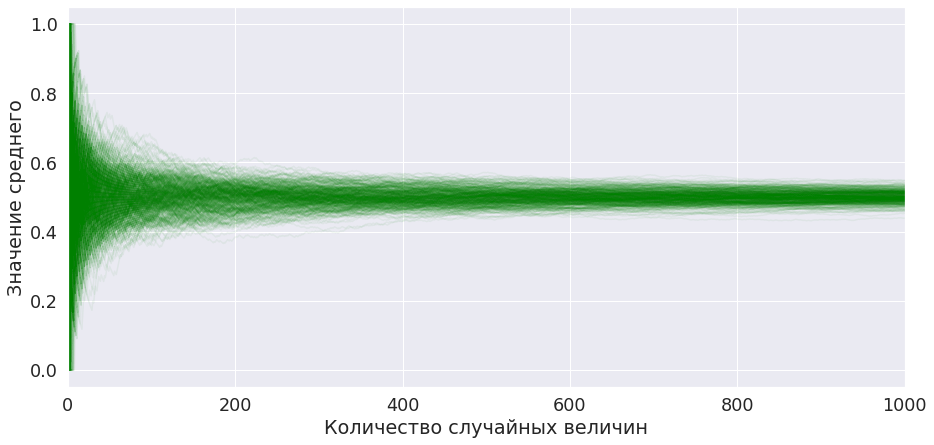

In [7]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Поставим ее еще больше

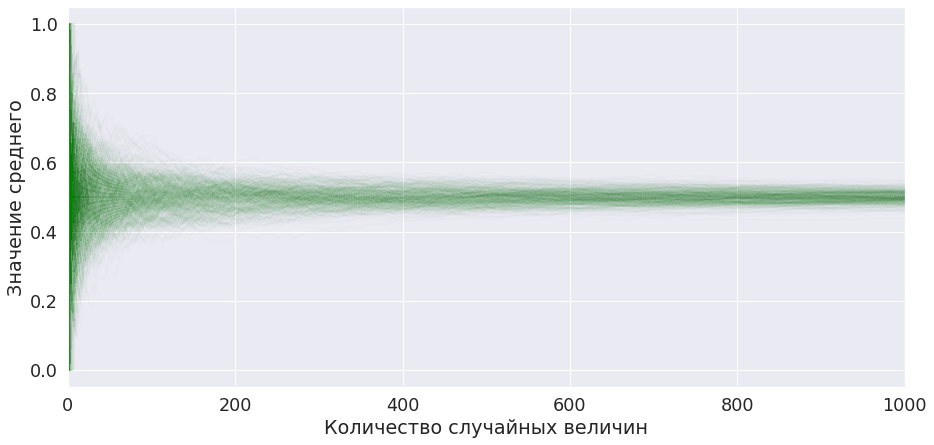

In [8]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.01)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Посмотрим на аналогичные графики для других распределений.

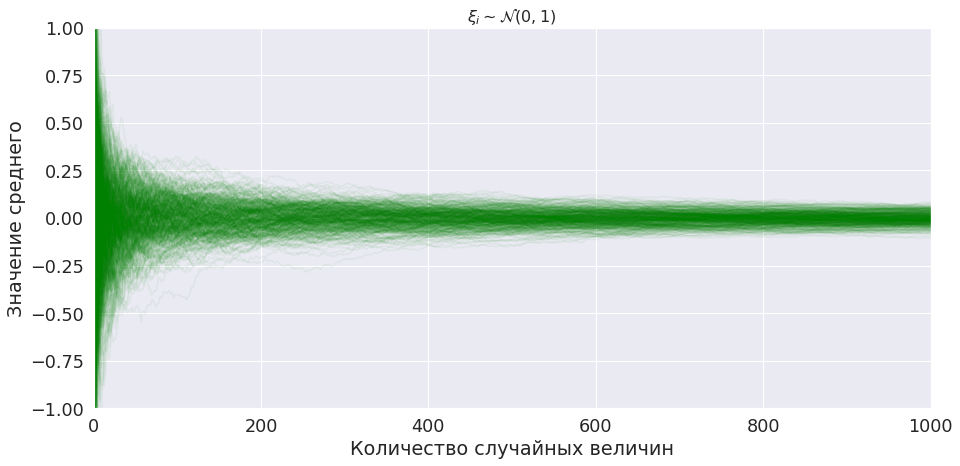

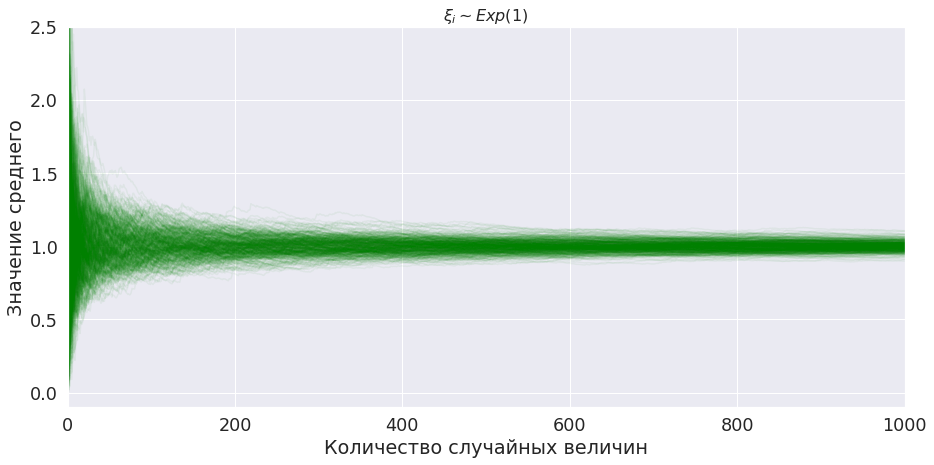

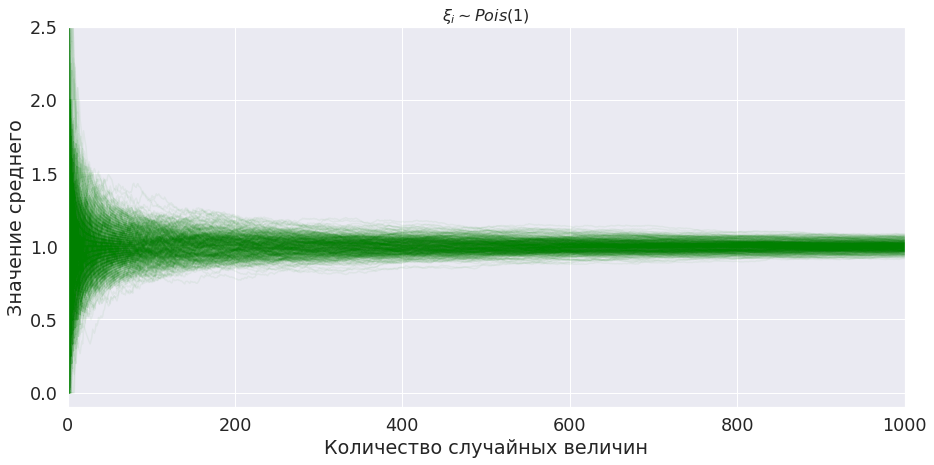

In [11]:
size = 1000
samples_count = 500

for distr, ylim, label in zip(
    [sps.norm(), sps.expon(), sps.poisson(mu=1)], 
    [(-1, 1), (-0.1, 2.5), (-0.1, 2.5)],
    ['$\\mathcal{N}(0, 1)$', '$Exp(1)$', '$Pois(1)$']
):
    
    # Генерация выборки и вычисление средних
    samples = distr.rvs(size=(samples_count, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

    # График
    plt.figure(figsize=(15, 7))
    for i in range(samples_count):
        plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.05)
    plt.title('$\\xi_i \\sim ' + label[1:], fontsize=16)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((0, size));
    plt.ylim(ylim)
    plt.show()

**Вывод:** При достаточность большом количестве случайных величин значение среднего не сильно
отклоняется от математического ожидания, причем чем больше случайных величин просуммированы, тем меньше отклонения. Данный эксперимент хорошо визуализирует закон больших чисел.